*Wykonała Amelia Bieda 275973*
# Prawa arcusa sinusa
Zweryfikujemy symulacyjnie prawa arcusa sinusa dla procesu Wienera. W tym celu porównamy histogramy oraz
dystrybuanty empirycznye wysymulowanych próbek z teoretycznymi wartościami.

Użyte biblioteki:

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import arcsine
import typing

Do sprawdzenia wszystkich praw arcusa sinusa skorzystamy z funkcji generującej proces Wienera.

In [29]:
def wiener_process(n: int) -> np.ndarray:
    """
    Generuje Proces Wienera na odcinku [0,1].
    Args:
        n (int): Liczba kroków w procesie.
    Returns:
        np.ndarray: Wysymulowany proces Wienera.
    Raises:
        ValueError: jeśli n jest mniejsze lub równe 0.
    Example:
    >>>wiener_process(n=5)
    array([ 0.        ,  0.38717331,  0.24244248, -0.41159833,  0.68927952, 1.46321067])
    """
    if n <= 0:
        raise ValueError("Unsupported argument value.")
    return np.concatenate(([0], np.cumsum(np.random.normal(0, np.sqrt(1 / n), n))))

Poniżej inicjalizujemy początkowe dane do symulacji, rozkład arcsine będziemy liczyć z *scipy.stats.arcsine*.

In [30]:
steps = 1000
size = 10**5
t = np.linspace(0, 1, steps)

### Pierwsze prawo arcusa sinusa
$T_+ =\lambda(\{t\in[0,1]|W_t>0\})$~Arcsine, gdzie $\lambda$ to miara Lebesgue'a. Oznacza to, że czas spędzony przez proces Wienera powyżej osi OX na odcinku $[0, 1]$ ma rozkład arcusa sinusa.

In [31]:
T = np.zeros(size)
for s in range(size):
    T[s] = np.sum(wiener_process(steps) > 0) / steps

C:\Users\ameli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ameli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


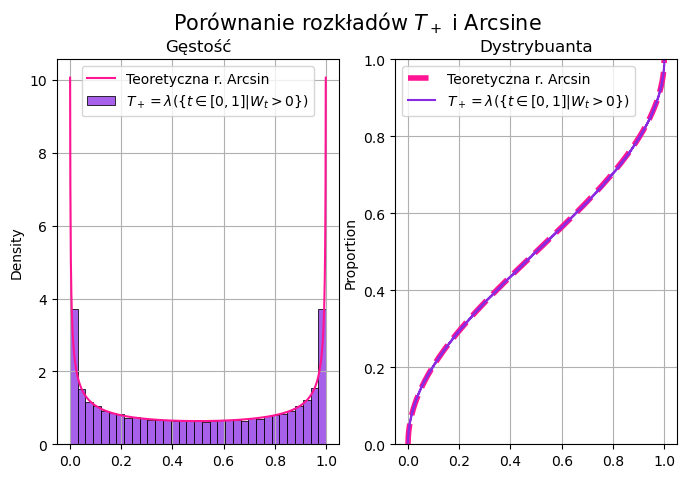

In [32]:
plt.figure(figsize=(8, 5))
plt.suptitle("Porównanie rozkładów $T_+$ i Arcsine", fontsize=15)

plt.subplot(1, 2, 1)
plt.plot(t, arcsine.pdf(t), color="deeppink", label="Teoretyczna r. Arcsin")
sns.histplot(
    T, stat="density", color="blueviolet", label="$T_+ =\lambda(\{t\in[0,1]|W_t>0\})$"
)
plt.title("Gęstość")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(
    t,
    arcsine.cdf(t),
    linestyle="--",
    lw=4,
    color="deeppink",
    label="Teoretyczna r. Arcsin",
)
sns.ecdfplot(T, color="blueviolet", label="$T_+ =\lambda(\{t\in[0,1]|W_t>0\})$")
plt.title("Dystrybuanta")
plt.legend()
plt.grid()
plt.show()

### Drugie prawo arcusa sinusa
$L=\sup\{t\in[0,1]|W_t=0\}$~Arcsine, czyli  ostatni moment uderzenia procesu Wienera na odcinku $[0, 1]$ w oś OX ma rozkład arcusa sinusa.

In [33]:
L = []
for s in range(size):
    przeciecia = np.where(np.diff(np.sign(wiener_process(steps))))[0]
    if przeciecia.size > 0:
        L.append(t[przeciecia[-1]])
    else:
        L.append(0)

C:\Users\ameli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ameli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


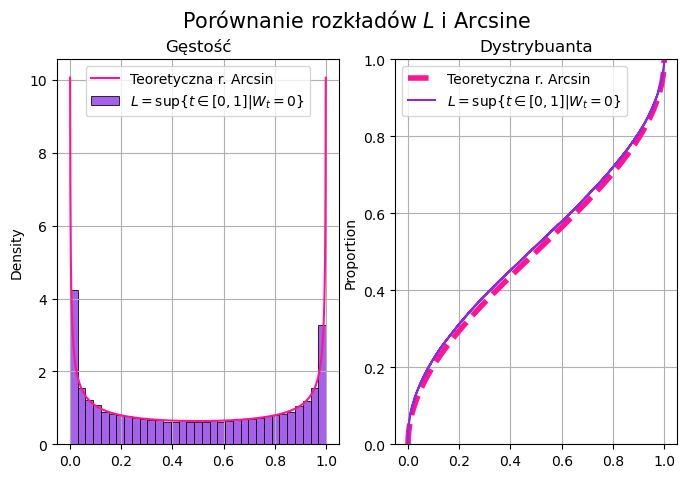

In [34]:
plt.figure(figsize=(8, 5))
plt.suptitle("Porównanie rozkładów $L$ i Arcsine", fontsize=15)

plt.subplot(1, 2, 1)
plt.plot(t, arcsine.pdf(t), color="deeppink", label="Teoretyczna r. Arcsin")
sns.histplot(L, stat="density", color="blueviolet", label="$L=\sup\{t\in[0,1]|W_t=0\}$")
plt.title("Gęstość")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(
    t,
    arcsine.cdf(t),
    linestyle="--",
    lw=4,
    color="deeppink",
    label="Teoretyczna r. Arcsin",
)
sns.ecdfplot(L, color="blueviolet", label="$L=\sup\{t\in[0,1]|W_t=0\}$")
plt.title("Dystrybuanta")
plt.legend()
plt.grid()
plt.show()

### Trzecie prawo arcusa sinusa
Niech $M$ będzie liczbą spełniającą $W_M=\sup\{|t\in[0,1]\}$. Wtedy $M$~Arcsine, czyli  moment osiągnięcia maksymalnej wartości przez proces Wienera na odcinku $[0, 1]$ ma rozkład arcusa sinusa.

In [35]:
M = np.zeros(size)
for s in range(size):
    M[s] = np.argmax(wiener_process(steps)) / steps

C:\Users\ameli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ameli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


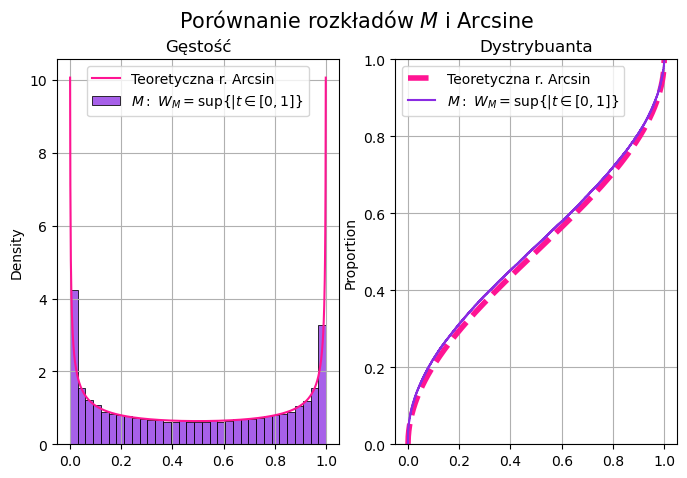

In [36]:
plt.figure(figsize=(8, 5))
plt.suptitle("Porównanie rozkładów $M$ i Arcsine", fontsize=15)

plt.subplot(1, 2, 1)
plt.plot(t, arcsine.pdf(t), color="deeppink", label="Teoretyczna r. Arcsin")
sns.histplot(L, stat="density", color="blueviolet", label="$M:~W_M=\sup\{|t\in[0,1]\}$")
plt.title("Gęstość")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(
    t,
    arcsine.cdf(t),
    linestyle="--",
    lw=4,
    color="deeppink",
    label="Teoretyczna r. Arcsin",
)
sns.ecdfplot(L, color="blueviolet", label="$M:~W_M=\sup\{|t\in[0,1]\}$")
plt.title("Dystrybuanta")
plt.legend()
plt.grid()
plt.show()

Wszystkie prawa arcusa sinusa zostały symulacyjnie dowiedzione.